# 타이타닉 생존자 데이터 가지고 와서 선형회귀 모델 구축 - 학습 - 평가 - 그래프 시각화

In [9]:
# auto-mpg.csv

import numpy as np
import pandas as pd

data_df = pd.read_csv("./titanic_new_family.csv", header = 0, engine = "python")
print(f"data_df의 크기 : {data_df.shape}")
data_df.head()

data_df의 크기 : (891, 17)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,2
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,2
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,1


In [10]:
# 특정 컬럼 제외하기 -> horsepower, orgin, car_name
data_df = data_df.drop(["fare", "embarked", "class","who", "adult_male", "deck", "embark_town", "alive", "alone" ], axis=1, inplace=False)
data_df.head()

,survived,pclass,sex,age,sibsp,parch,age2,family
0,0,3,1,22.0,1,0,2,2
1,1,1,0,38.0,1,0,3,2
2,1,3,0,26.0,0,0,2,1
3,1,1,0,35.0,1,0,3,2
4,0,3,1,35.0,0,0,3,1


In [11]:
# 기본 컬럼 조사 info()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   age2      891 non-null    int64  
 7   family    891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [12]:
# 선형회귀 모델을 활용해서 

# 선형(직선) 회귀분석을 이용해서 분석 모델을 구축
from sklearn.linear_model import LinearRegression
# 학습용, 테스트용의 데이터 분리해 주기
from sklearn.model_selection import train_test_split
# 분석 평가지수 MSE(오류의 제곱평균 : 낮을수록 좋다. 모델의 예측값이 실제값과 거의 비슷.)
# R^2 : 예측값 / 실제값 나눈 비율 : 클수록 좋다. 모델의 예측값이 실제값과거의 비슷
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# X,Y분할 독립변수, 종속변수를 나누는 작업
Y = data_df["survived"]
# PRICE를 제외한 나머지 변수를 가지고 오기
# axis = 1 : 열기준
# inplace=False : 원본에 영향을 주지 않겠다
X = data_df.drop(["survived"], axis=1, inplace=False)

In [14]:
# 훈련용, 테스트용으로 데이터를 분리하는 작업
# test_size=0.3 : 비율 -> 학습데이터:70%, 평가데이터:30% 를 쓰겠다.
# random_state=0 : 동일한 방식으로 데이터 분할 -> 동일성 보장
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [15]:
print(f"X_train : {X_train.shape}, X_test : {X_test.shape}, Y_train : {Y_train.shape}, Y_test : {Y_test.shape}")

X_train : (623, 7), X_test : (268, 7), Y_train : (623,), Y_test : (268,)


In [16]:
# 선형 회귀 분석을 이용해서 모델 생성
lr = LinearRegression()

In [17]:
# 모델을 이용해서 훈련하기
lr.fit(X_train, Y_train)

LinearRegression()

In [18]:
# 학습된 모델을 이용해서 평가하기, 예측값을 이용해서 실제값과 비교하기
# 예) mk가 70문제로 학습한 모델을 테스트 확인하는 작업
# 예) 30문제로 평가하기, 예측값 구하기
y_predict = lr.predict(X_test)

In [19]:
# 평가분석 지표
# MSE : 오류 제곱 평균
# R^2 Score : 예측값 / 실제값 나눈비율
# Y_test : 답지, y_predict : mk가 학습해서 시험친 결과
mse = mean_squared_error(Y_test, y_predict)
# 4 -> 루트4 -> 2 : 값을 통일 시켰다. 나중에 스케일링을 많이 함, 정규화등으로 고쳐야 통계시 효율적으로 작업이 진행되므로 이런작업을 많이 함
rmse = np.sqrt(mse)
r2_value = r2_score(Y_test, y_predict)

print(f"mse : {mse}, rmse : {rmse}, r2_value : {r2_value}")

mse : 0.1414510083038167, rmse : 0.376099731858209, r2_value : 0.39526326068968265


In [20]:
# 선형 회귀 분석, 직선의 구성 요소
# y절편, 계수 등에 대해서 직선을 분석해 보기

print(f"Y절편의 값 : {lr.intercept_}")

# mpg	cylinders	displacement	weight	acceleration	model_year
# 독립변수의 계수 값
print(f"회귀 계수의 값 : {np.round(lr.coef_, 1)}")

Y절편의 값 : 1.3756592661806397
회귀 계수의 값 : [-0.2 -0.5 -0.  -0.   0.   0.  -0. ]


In [21]:
# mpg	cylinders	displacement	weight	acceleration	model_year
coef = pd.Series(data=np.round(lr.coef_,2), index=X.columns)
coef.sort_values(ascending = False)

age2      0.04
parch     0.00
age      -0.01
family   -0.02
sibsp    -0.03
pclass   -0.17
sex      -0.52
dtype: float64

# 직선 -> y = ax + b
# Y (mpg) = 0.76 x X(model_year) + 0.20 x X(acceleration) + ....
# 계수들은, 모델의 성능을 최적화 할 때, 사용이 되는 하이퍼 매개변수, 웨이트 값(비중값)

IndexError: list index out of range

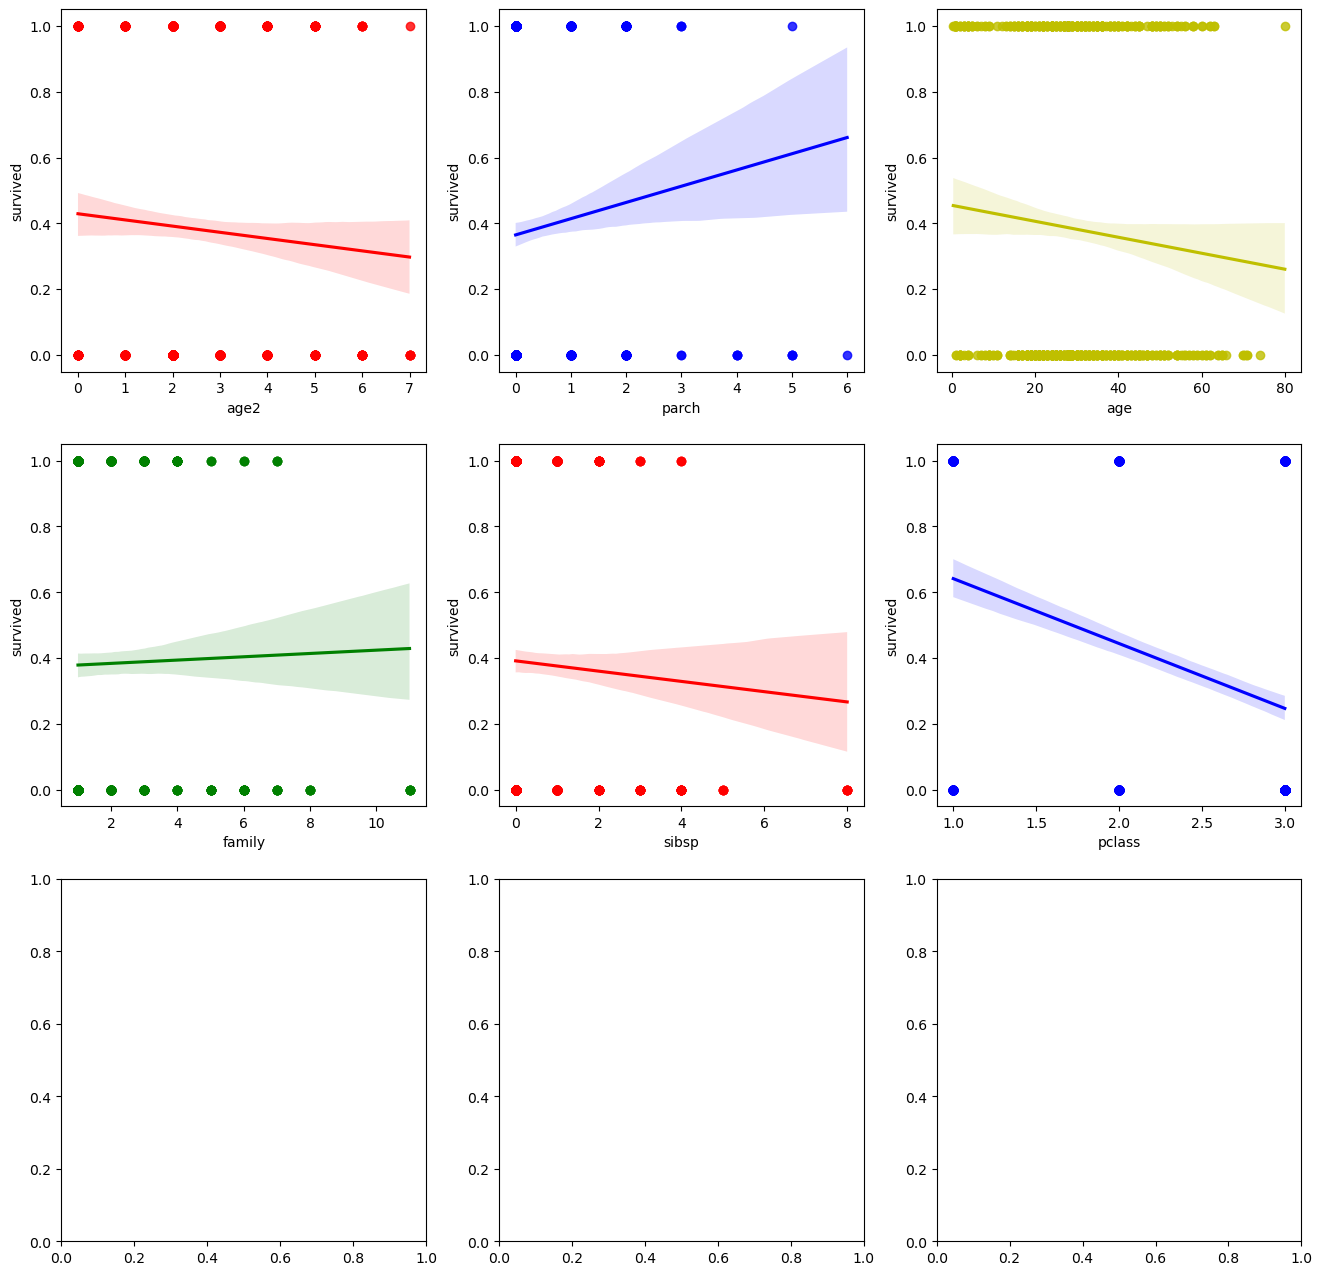

In [22]:
# 학습된 모델을 통해서, 예측값도 구하고, 실제값과 비교도하고, MSE R^2 , 평가 지표 
# 학습된 모델의 예측값, 실제값과 얼마나 일치하는 지를 조사. 
# 시각화 
import matplotlib.pyplot as plt 
import seaborn as sns 

# 이미지들을 , 2 x 3 , 표 형태로 나타내기. 
fig, axs = plt.subplots(figsize = (16,16), ncols = 3, nrows = 3)

x_features = ["age2","parch","age","family","sibsp", "pclass","sex"]

# 그래프의 색상 옵션 
plot_color = ["r","b", "y", "g", "r","b"]

for i, feature in enumerate(x_features):
  # 몫 -> 2개 행으로 
  row = int(i/3)
  # 나머지 -> 0,1,2 반복
  col = i % 3
  sns.regplot(x = feature, y="survived", data = data_df, ax = axs[row][col], color = plot_color[i])